In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

In [ ]:
raw =  pd.read_csv("data/dataset_mood_smartphone.csv")
df = pd.read_csv("data/new_data.csv")

df = df.drop(["Unnamed: 0"], axis=1) if "Unnamed: 0" in df.columns else df
raw = raw.drop(["Unnamed: 0"], axis=1) if "Unnamed: 0" in raw.columns else raw

In [ ]:
df

,unique_id,id,date,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game
0,2014-02-26_AS14.01,AS14.01,2014-02-26,6.25,NaN,NaN,NaN,6.25,NaN,0.75,-0.250000,NaN,NaN,NaN,NaN
1,2014-03-21_AS14.01,AS14.01,2014-03-21,6.25,6.0,NaN,55.095526,6.40,75.141667,0.20,0.200000,6.193000,57.402,53.024000,NaN
2,2014-03-22_AS14.01,AS14.01,2014-03-22,6.40,NaN,NaN,51.697063,6.80,36.636000,NaN,0.600000,7.025333,NaN,46.662000,NaN
3,2014-03-23_AS14.01,AS14.01,2014-03-23,6.80,NaN,NaN,53.442031,6.00,50.046611,0.80,0.200000,10.850750,NaN,31.448667,NaN
4,2014-03-24_AS14.01,AS14.01,2014-03-24,6.00,NaN,NaN,47.541687,6.75,74.968047,0.00,0.800000,5.684333,3.010,122.121375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2014-05-25_AS14.33,AS14.33,2014-05-25,6.25,3.0,8.0,34.829867,5.40,45.534460,NaN,-0.750000,NaN,NaN,64.738667,NaN
1211,2014-05-26_AS14.33,AS14.33,2014-05-26,5.40,10.0,3.0,34.320472,6.20,111.046204,0.00,-0.400000,NaN,130.530,68.876900,NaN
1212,2014-05-27_AS14.33,AS14.33,2014-05-27,6.20,1.0,2.0,59.382943,8.20,50.259100,0.40,-0.600000,NaN,NaN,62.347000,NaN
1213,2014-05-28_AS14.33,AS14.33,2014-05-28,8.20,10.0,1.0,37.238750,7.00,99.281685,1.20,0.000000,NaN,NaN,43.907571,NaN


In [ ]:
df.isnull().sum(axis=0)

unique_id                   0
id                          0
date                        0
average_mood                0
total_calls               693
total_sms                1048
average_com               112
mood_next_day               0
average_soc               290
average_valence           114
average_arousal            44
average_finance          1015
average_office            958
average_entertainment     423
average_game             1036
dtype: int64

In [ ]:
df['total_calls'] = df['total_calls'].replace(np.nan, 0)
df['total_sms'] = df['total_sms'].replace(np.nan, 0)
df['average_com'] = df['average_com'].replace(np.nan, 0)
df['average_soc'] = df['average_soc'].replace(np.nan, 0)
df['average_finance'] = df['average_finance'].replace(np.nan, 0)
df['average_entertainment'] = df['average_entertainment'].replace(np.nan, 0)
df['average_office'] = df['average_office'].replace(np.nan, 0)
df['average_game'] = df['average_game'].replace(np.nan, 0)

In [ ]:
df

,unique_id,id,date,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game
0,2014-02-26_AS14.01,AS14.01,2014-02-26,6.25,0.0,0.0,0.000000,6.25,0.000000,0.75,-0.250000,0.000000,0.000,0.000000,0.0
1,2014-03-21_AS14.01,AS14.01,2014-03-21,6.25,6.0,0.0,55.095526,6.40,75.141667,0.20,0.200000,6.193000,57.402,53.024000,0.0
2,2014-03-22_AS14.01,AS14.01,2014-03-22,6.40,0.0,0.0,51.697063,6.80,36.636000,NaN,0.600000,7.025333,0.000,46.662000,0.0
3,2014-03-23_AS14.01,AS14.01,2014-03-23,6.80,0.0,0.0,53.442031,6.00,50.046611,0.80,0.200000,10.850750,0.000,31.448667,0.0
4,2014-03-24_AS14.01,AS14.01,2014-03-24,6.00,0.0,0.0,47.541687,6.75,74.968047,0.00,0.800000,5.684333,3.010,122.121375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2014-05-25_AS14.33,AS14.33,2014-05-25,6.25,3.0,8.0,34.829867,5.40,45.534460,NaN,-0.750000,0.000000,0.000,64.738667,0.0
1211,2014-05-26_AS14.33,AS14.33,2014-05-26,5.40,10.0,3.0,34.320472,6.20,111.046204,0.00,-0.400000,0.000000,130.530,68.876900,0.0
1212,2014-05-27_AS14.33,AS14.33,2014-05-27,6.20,1.0,2.0,59.382943,8.20,50.259100,0.40,-0.600000,0.000000,0.000,62.347000,0.0
1213,2014-05-28_AS14.33,AS14.33,2014-05-28,8.20,10.0,1.0,37.238750,7.00,99.281685,1.20,0.000000,0.000000,0.000,43.907571,0.0


<AxesSubplot:>

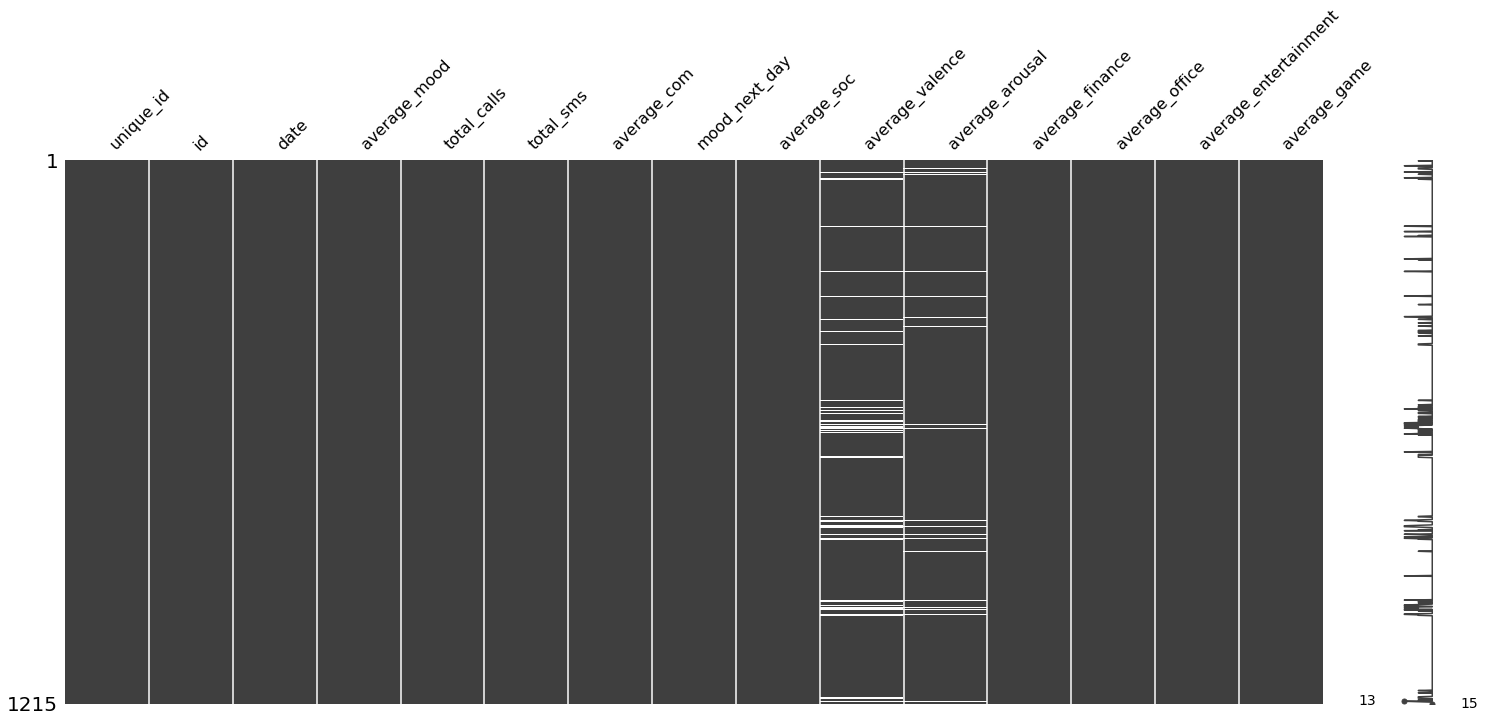

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [ ]:
df['average_valence'] = df['average_valence'].fillna(df.groupby('id')['average_valence'].transform('mean'))
df['average_arousal'] = df['average_arousal'].fillna(df.groupby('id')['average_arousal'].transform('mean'))

In [ ]:
df.isnull().sum(axis=0)

unique_id                0
id                       0
date                     0
average_mood             0
total_calls              0
total_sms                0
average_com              0
mood_next_day            0
average_soc              0
average_valence          0
average_arousal          0
average_finance          0
average_office           0
average_entertainment    0
average_game             0
dtype: int64

In [ ]:
df.to_csv('new_data_no_missingvalues.csv')

In [ ]:
corr_ = df.corr()

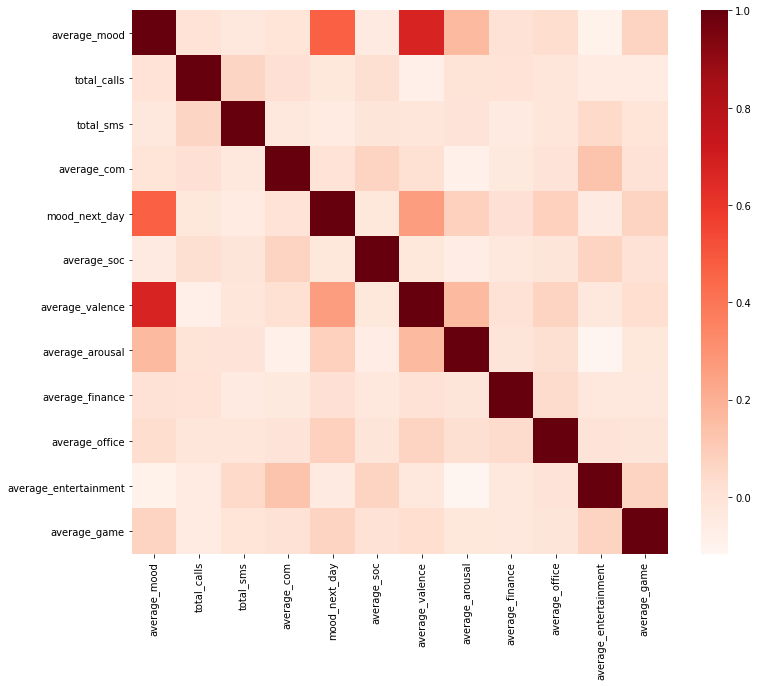

In [ ]:
try:
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_, # annot=True, # Annotations will take an incredibly long time... better to leave them off
    cmap=plt.cm.Reds)
    plt.show()
except Exception as exc:
    print(f"While working without supervision...\nEncountered {exc}")

In [ ]:
dfp = df.drop(["date", "id", "unique_id"], axis=1)

In [ ]:
dfp = dfp/dfp.std(0)

In [ ]:
dfp = minmax_scaling(dfp, columns=dfp.columns)
dfp = np.log(dfp+1)

In [ ]:
for col in dfp.columns:
    df[col] = dfp[col]

In [ ]:
corr = dfp.corr()

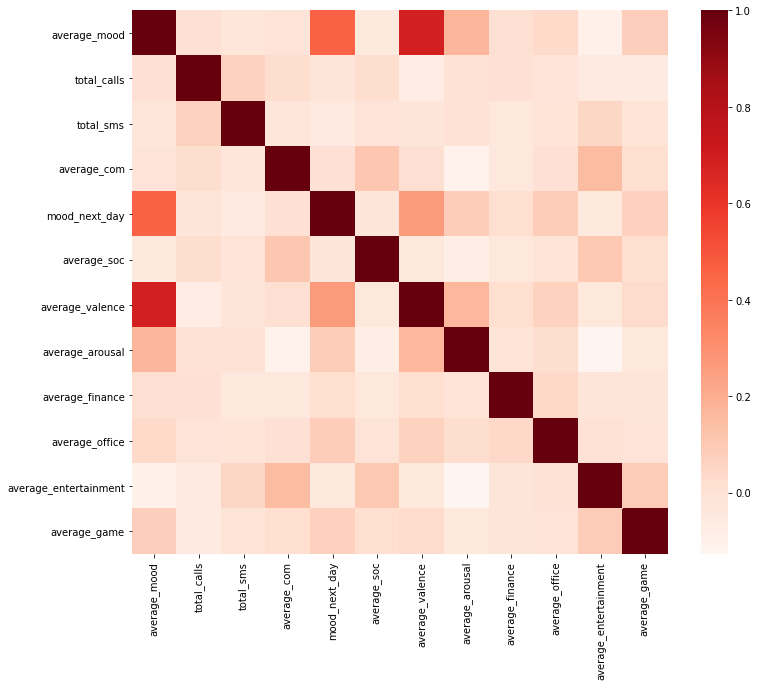

In [ ]:
# Lets see if we can plot it, because a plot can tell more than a thousands words (right?)
try:
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, # annot=True, # Annotations will take an incredibly long time... better to leave them off
    cmap=plt.cm.Reds)
    plt.savefig('correlations.png')
    plt.show()
except Exception as exc:
    print(f"While working without supervision...\nEncountered {exc}")

##### So features that correlate with the mood the next day: the average current mood of the person, the average valence of that day, the average arousal of that day. (Maybe slightly average office app usage and average game app usage)

In [ ]:
df.drop([x for x in df.columns if df[x].dtype != np.float64 or x == "mood_next_day"], axis=1)

,average_mood,total_calls,total_sms,average_com,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game
0,0.414199,0.000000,0.000000,0.000000,0.000000,0.479573,0.362905,0.000000,0.000000,0.000000,0.0
1,0.414199,0.176931,0.000000,0.100209,0.019792,0.368908,0.438255,0.040675,0.037681,0.031616,0.0
2,0.429730,0.000000,0.000000,0.094310,0.009699,0.469744,0.500775,0.046017,0.000000,0.027875,0.0
3,0.470004,0.000000,0.000000,0.097343,0.013225,0.489052,0.438255,0.070212,0.000000,0.018872,0.0
4,0.387766,0.000000,0.000000,0.087050,0.019746,0.325422,0.530628,0.037396,0.002012,0.071371,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,0.414199,0.092373,0.205852,0.064506,0.012040,0.426998,0.271934,0.000000,0.000000,0.038468,0.0
1211,0.321320,0.279585,0.082238,0.063592,0.029112,0.325422,0.336472,0.000000,0.083715,0.040878,0.0
1212,0.408968,0.031749,0.055570,0.107602,0.013281,0.410580,0.300105,0.000000,0.000000,0.037073,0.0
1213,0.599415,0.279585,0.028171,0.068817,0.026068,0.561811,0.405465,0.000000,0.000000,0.026251,0.0


In [ ]:
from sklearn.decomposition import PCA

n_components = 3

pca_app = PCA(n_components=n_components)

PCA_DATA = df.drop([x for x in df.columns if df[x].dtype != np.float64 or x == "average_mood"], axis=1)

pca_app.fit(
    PCA_DATA
    )

M = pca_app.transform(PCA_DATA)

In [ ]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_app.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    M,
    labels=labels,
    dimensions=range(n_components),
    color=df["average_mood"]
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
total_var = pca_app.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(M, x=0, y=1, z=2, color=df["average_mood"],
title=f"Total Explained Variance: {total_var:.2f}%",
labels={
    "0": "PC 1",
    "1": "PC 2",
    "2": "PC 3",
})
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79defa5-2359-4699-82dc-d6bf5eddd7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>